## K-Means Clustering

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

-78.85144142614602

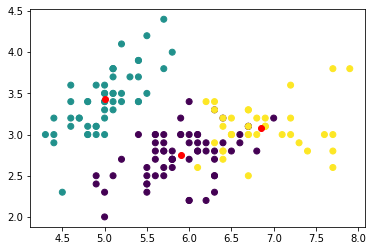

In [16]:
iris = load_iris()
X =iris.data
y = iris.target
model = KMeans(n_clusters=3, n_init=10,max_iter=200)
model.fit(X)
model.predict(X) # La facon dont les echantillon sont classe
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')
# Calcule de l'inertia == La fonction cout du model
model.inertia_ # meme chose que model.score(X)
model.score(X) # obtenir la valeur exprimer de facon d2nagtive

### Choisir le bon nombre de cluster

In [26]:
inertia = []
Y = X[:,0:2]
Y.shape
k_range = range(1,20)
for k in k_range:
    newModel = KMeans(n_clusters=k).fit(X)
    inertia.append(newModel.inertia_)

Text(0, 0.5, 'Cout du modele (Inertia)')

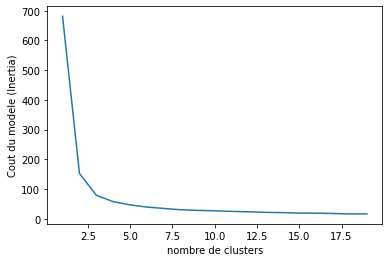

In [27]:
plt.plot(k_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## Isolation Forest 
## Anomaly Detection

In [1]:
# Detection d'anomalie
from sklearn.datasets.samples_generator import make_blobs

In [2]:
X,y = make_blobs(n_samples=100,centers=1,cluster_std=10,random_state=100)
#X[-1,:] = np.array([2.25,5])
plt.scatter(X[:,0],X[:,1])

NameError: name 'plt' is not defined

### Application Decontamination Digits

In [12]:
from sklearn.datasets import load_digits
from sklearn.ensemble import IsolationForest

In [13]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


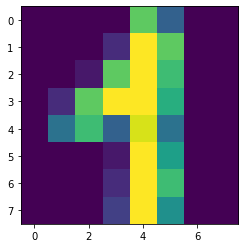

In [17]:
plt.imshow(images[42])

In [19]:
model = IsolationForest(random_state=0,contamination=0.02,)

In [20]:
model.fit(X)
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
outliers = model.predict(X) == -1

Text(0.5, 1.0, '2')

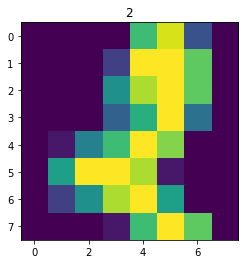

In [25]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.ensemble import IsolationForest

In [3]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


In [16]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

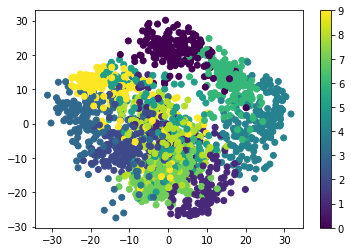

In [18]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.colorbar()

In [20]:
model.components_.shape

(2, 64)

In [5]:
# Compresser un dataset dans le but  d'acceler l'apprentissage
modell = PCA(n_components=64)
X_reducedd = modell.fit_transform(X)

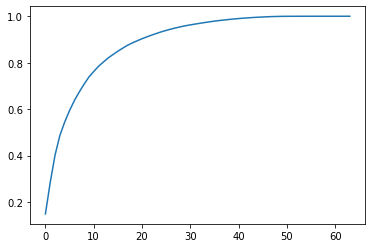

In [8]:
import numpy as np
plt.plot(np.cumsum(modell.explained_variance_ratio_))

In [10]:
np.argmax(np.cumsum(modell.explained_variance_ratio_)) >0.99

True

In [19]:
modell = PCA(n_components=64)
X_reducedd = modell.fit_transform(X)

In [20]:
X_recoverd = modell.inverse_transform(X_reducedd)

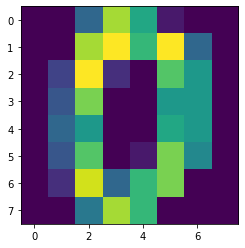

In [21]:
plt.imshow(X_recoverd[0].reshape((8,8)))

In [23]:
modell.n_components_

64